In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:/Users/ASUS/my_movies.csv')
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df1=df.iloc[:,5:]

In [4]:
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sixth Sense,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
Gladiator,10.0,0.7,0.483046,0.0,0.25,1.0,1.0,1.0
LOTR1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter1,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Patriot,10.0,0.6,0.516398,0.0,0.00,1.0,1.0,1.0
LOTR2,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0
Harry Potter2,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
LOTR,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Braveheart,10.0,0.1,0.316228,0.0,0.00,0.0,0.0,1.0
Green Mile,10.0,0.2,0.421637,0.0,0.00,0.0,0.0,1.0


In [6]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [7]:
df1.dtypes

Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object

In [9]:
df1.shape

(10, 10)

In [8]:
#With 10% support
frequent_itemsets=apriori(df1,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [9]:
#Cnfidence 80%
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
241,(Harry Potter1),"(Green Mile, LOTR2, Sixth Sense, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(LOTR1),"(LOTR2, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR2),"(Green Mile, Sixth Sense, Harry Potter1, LOTR1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(Sixth Sense),"(LOTR2, Green Mile, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


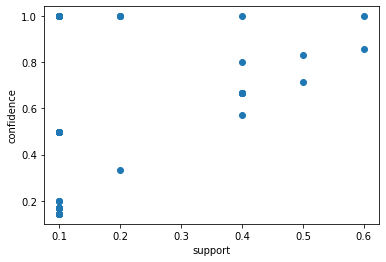

In [10]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [18]:
#With 15% support
frequent_itemsets=apriori(df1,min_support=0.15,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Sixth Sense, Green Mile)"


In [19]:
#Cnfidence 75%
rules2=association_rules(frequent_itemsets,metric='lift',min_threshold=0.75)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


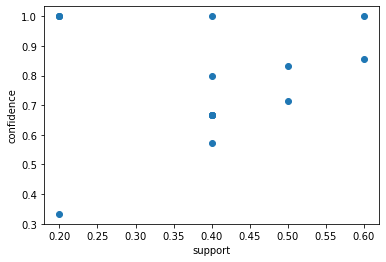

In [25]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [22]:
#Confidence 30%
frequent_itemsets=apriori(df1,min_support=0.30,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Gladiator, Sixth Sense)"
4,0.4,"(Patriot, Sixth Sense)"
5,0.6,"(Gladiator, Patriot)"
6,0.4,"(Gladiator, Patriot, Sixth Sense)"


In [23]:
#Confidence 60%
rules3=association_rules(frequent_itemsets,metric='lift',min_threshold=0.60)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
9,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


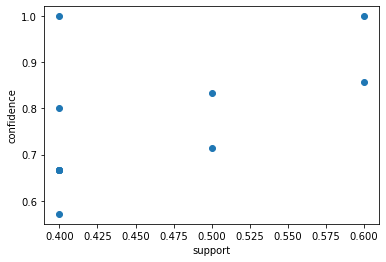

In [26]:
plt.scatter(rules3['support'],rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()